In [1]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

### Problem 1

In [14]:
markov_chain = np.array([[1/2, 1/3, 1/6], [0, 1/3, 2/3], [1/2, 0, 1/2]])
markov_chain

array([[0.5       , 0.33333333, 0.16666667],
       [0.        , 0.33333333, 0.66666667],
       [0.5       , 0.        , 0.5       ]])

In [12]:
def markov_step(u:float, current_state:int, transition_proba:np.ndarray):
    """
    Determine the Markov-Step based on current state 
    """
    X = np.cumsum(transition_proba[current_state, :])

    for idx, i in enumerate(X):
        if idx == 0:
            low, upp = 0, X[idx]
        else:
            low, upp = X[idx-1], X[idx]
        
        if low < u <= upp:
            return idx

In [18]:
def prob1_sim(N:int, MC:np.ndarray, starting_state:int=0):
    """
    Use Uniform random variable to generate MC sequence/path
    """
    i = starting_state
    xarr = [0]*N
    for idx in range(N):
        U = np.random.uniform(0, 1)
        next_step = markov_step(u=U, current_state=i, transition_proba=MC)
        xarr[idx] = next_step
        i = next_step
    return xarr

#### 1.C

In [55]:
# Simulate 10 steps of the MC, which correspond to X_10, given starting from state 0
# Take the last step and simply average the count of sequences that contain 1
P = np.array([prob1_sim(N=10, MC=markov_chain, starting_state=0)[-1] for i in range(100)])
print(f'P(X_10 = 1|X_0 = 0) = {(P == 1).sum() / P.size}')

P(X_10 = 1|X_0 = 0) = 0.23


#### 1.D

In [59]:
# Simulate 10 steps of the MC, which correspond to X_10, given starting from state 0
# Take the last step and simply average the terminal value
P = np.array([prob1_sim(N=10, MC=markov_chain, starting_state=0)[-1] for i in range(100)])
print(f'E[X10|X0 = 0] = {P.mean()}')

E[X10|X0 = 0] = 1.09


#### 1.E

In [106]:
# Simulate 10 steps of the MC, which correspond to X_10, given starting from state 0
# Count the number of instances where 1 is hit within the first ten steps
P = np.array([prob1_sim(N=10, MC=markov_chain, starting_state=0) for i in range(100)])
P = np.array([1 if 1 in i else 0 for i in P])
print(f'P(T ≤ 10|X0 = 0) = {(P == 1).sum() / P.size}')

P(T ≤ 10|X0 = 0) = 0.9


#### 1.F

In [123]:
# Simulate 1000 steps of the MC, given starting from state 0
# Count the average time it takes to arrive first at state 1
P = np.array([prob1_sim(N=1000, MC=markov_chain, starting_state=0) for i in range(100)])
P = np.array([i.tolist().index(1) if 1 in i else i.size for i in P])
print(f'E[T|X0 = 0] = {P.mean()}')

E[T|X0 = 0] = 3.13


#### 1.G

In [142]:
P = np.array([prob1_sim(N=10000, MC=markov_chain, starting_state=0)])
P = P[:, 100:]
long_run_prop = {i : P[P == i].size / P.size for i in [0, 1, 2]}
print(f'Long-run proportions: {long_run_prop}')

Long-run proportions: {0: 0.40585858585858586, 1: 0.19161616161616163, 2: 0.4025252525252525}


#### 1.H

In [144]:
cost_func = {0:1, 1:3, 2:2}
print(f'Long-run average cost {sum([long_run_prop[i]*cost_func[i] for i in long_run_prop])}')

Long-run average cost 1.7857575757575759


### Problem 2

In [5]:
alpha = 0.2 
beta = 0.4
markov_chain = np.array([[alpha, 1-alpha], [1-beta, beta]])
markov_chain

array([[0.2, 0.8],
       [0.6, 0.4]])

In [9]:
def markov_step(u:float, current_state:int, transition_proba:np.ndarray):
    """
    Determine the Markov-Step based on current state 
    """
    X = np.cumsum(transition_proba[current_state, :])
    
    for idx, i in enumerate(X):
        if idx == 0:
            low, upp = 0, X[idx]
        else:
            low, upp = X[idx-1], X[idx]
        
        if low < u <= upp:
            return idx

#### 2.B

In [179]:
def prob2b_sim(N:int, MC:np.ndarray, starting_state:int=0, starting_active:int=10, max_ppl:int=100):
    """
    Use Uniform random variable to generate MC sequence/path
    """
    i = starting_active
    j = starting_state
    
    xarr = [0]*N
    for idx in range(N):
        U = np.random.uniform(0, 1)
        next_step = markov_step(u=U, current_state=j, transition_proba=MC)
        
        if next_step == 0:
            i = 100 if i + 1 > 100 else i + 1
        else:
            i = 0 if i - 1 < 0 else i - 1
        
        j = next_step
        xarr[idx] = i   
       
    return xarr

In [187]:
P = np.array(prob2b_sim(N=10000, MC=markov_chain, starting_state=0, starting_active=10, max_ppl=100))
print(f'Long-Run Average of active: {P[1000:].mean()}')

Long-Run Average of active: 1.4097777777777778


#### 2.D

In [38]:
def prob2d_sim(N:int, MC:np.ndarray, starting_state:int=0, active:int=10, inactive:int=0, max_ppl:int=100):
    """
    Use Uniform random variable to generate MC sequence/path
    """

    next_step1, next_step2 = starting_state, starting_state
    xarr = [0]*N
    
    for idx in range(N):
        U1 = np.random.uniform(0, 1)
        next_step1 = markov_step(u=U1, current_state=next_step1, transition_proba=MC)
        
        if next_step1 == 0:
            active = 100 if active + 1 > 100 else active + 1
        else:
            active = 0 if active - 1 < 0 else active - 1
        
        U2 = np.random.uniform(0, 1)
        next_step2 = markov_step(u=U2, current_state=next_step2, transition_proba=MC)
        
        if next_step2 == 0:
            inactive = 100 if inactive + 1 > 100 else inactive + 1
        else:
            inactive = 0 if inactive - 1 < 0 else inactive - 1
        
        xarr[idx] = (active, inactive)   
       
    return xarr

In [51]:
P = np.array(prob2d_sim(N=10000, MC=markov_chain, starting_state=0, active=10, inactive=0, max_ppl=100))
val = P[1000:,0] > P[1000:,1]
print(f'Long-Run Average of active: {val.sum() / val.size}')

Long-Run Average of active: 0.38855555555555554


### Problem 3

In [30]:
def metropolis_hastings(X:np.ndarray, n_iter:int=1000, burn_in:int=100):
    
    d = 10
    target = 20
    samples = []
    
    for i in range(n_iter):
        Y = X + np.random.uniform(-1, 1, size=d)
        
        if (np.prod(Y) > target) and (Y > 0).all():
            proba = min(1, np.exp(-np.sum(Y)) / np.exp(-np.sum(X)))
        else:
            proba = 0 
        
        if np.random.uniform(0, 1) < proba:
            X = Y
            if i > burn_in:
                samples.append(Y.copy())
    
    return samples

In [31]:
initial_value = np.ones(10)*20**(1/10)
x_dist = metropolis_hastings(X=initial_value, n_iter=1000, burn_in=100)

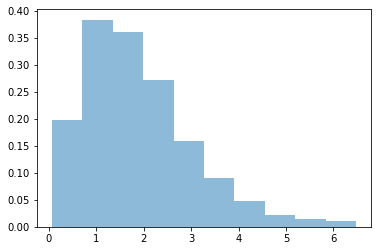

In [32]:
plt.hist(np.array(x_dist).flatten(), alpha=0.5, density=True)
plt.show()

### Problem 4

In [48]:
def metropolis_hastings_4a(initial_vector:tuple, n_iter:int=1000, burn_in:int=100):
    
    x, y, z = initial_vector[0], initial_vector[1], initial_vector[2]
    samples = []
    
    for i in range(n_iter):
        x_bar = x + np.random.uniform(-1, 1)
        y_bar = y + np.random.uniform(-1, 1)
        z_bar = z + np.random.uniform(-1, 1)
        
        if (x_bar > 0) and (y_bar > 0) and (z_bar > 0):
            
            num = np.exp(-(x_bar + y_bar + z_bar + x_bar*y_bar + x_bar*z_bar + y_bar*z_bar))
            dem = np.exp(-(x + y + z + x*y + x*z + y*z))
            
            proba = min(1, num/dem)
        else:
            proba = 0 
        
        if np.random.uniform(0, 1) < proba:
            x = x_bar
            y = y_bar
            z = z_bar
            
            if i > burn_in:
                samples.append(x*y*z)
    
    return samples

In [49]:
x_dist = metropolis_hastings_4a(initial_vector=[1, 1, 1], n_iter=1000, burn_in=100)
print(f'E[XYZ]: {np.array(x_dist).mean()}') 

E[XYZ]: 0.1217586246686568


In [50]:
def gibbs_sampler_4b(initial_vector:tuple, n_iter:int=1000, burn_in:int=100):
    
    x, y, z = initial_vector[0], initial_vector[1], initial_vector[2]
    samples = []
    
    def func(xval, yval, zval) -> float:
        return np.exp(-(xval + yval + zval + xval*yval + xval*zval + yval*zval))
    
    for i in range(n_iter):
        x_bar = x + np.random.uniform(-1, 1)
        y_bar = y + np.random.uniform(-1, 1)
        z_bar = z + np.random.uniform(-1, 1)
        
        if (x_bar > 0):
            proba = min(1, func(x_bar, y, z)/func(x, y, z))
            if np.random.uniform(0, 1) < proba:
                x = x_bar

        if (y_bar > 0):
            proba = min(1, func(x, y_bar, z)/func(x, y, z))
            if np.random.uniform(0, 1) < proba:
                y = y_bar
    
        if (z_bar > 0):
            proba = min(1, func(x, y, z_bar)/func(x, y, z))
            if np.random.uniform(0, 1) < proba:
                z = z_bar
        
        if i > burn_in:
            samples.append(x*y*z)
    
    return samples

In [51]:
x_dist = gibbs_sampler_4b(initial_vector=[1, 1, 1], n_iter=1000, burn_in=100)
print(f'E[XYZ]: {np.array(x_dist).mean()}') 

E[XYZ]: 0.09302571920824325
